In [1]:
from datasets.dtu import DTUDataset
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
dataset = DTUDataset('/home/ubuntu/data/mvs_training/dtu/', 'train', 3, 256)

In [3]:
imgs, proj_mats, depth, depth_values, mask = dataset[0]
unpreprocess = T.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], 
                           std=[1/0.229, 1/0.224, 1/0.225])

# Show an example training data

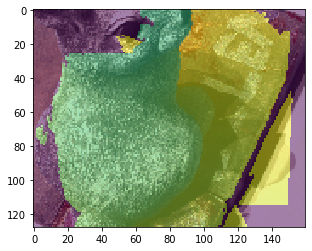

In [4]:
plt.imshow(unpreprocess(imgs[0]).permute(1,2,0)[::4,::4])
plt.imshow(depth, alpha=0.5)

# Load model

In [5]:
from utils import load_ckpt
from models.mvsnet import MVSNet
from inplace_abn import ABN
model = MVSNet(ABN).cuda()
load_ckpt(model, 'ckpts/exp5/_ckpt_epoch_14.ckpt')
model.eval();

# Do inference

inference time 0.1944897174835205


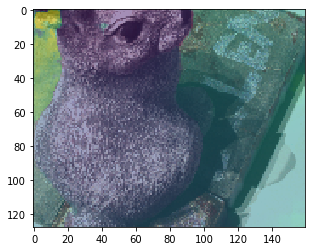

In [6]:
t = time.time()
with torch.no_grad():
    depth_pred, confidence = model(imgs.unsqueeze(0).cuda(),
                                   proj_mats.unsqueeze(0).cuda(),
                                   depth_values.unsqueeze(0).cuda())
    torch.cuda.synchronize()
print('inference time', time.time()-t)
plt.imshow(unpreprocess(imgs[0]).permute(1,2,0)[::4,::4])
plt.imshow(depth_pred[0].cpu(), alpha=0.5);

## Reference: show pixels whose absolute depth error is less than 2mm

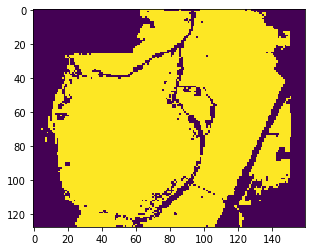

In [7]:
plt.imshow(torch.abs(depth-depth_pred.cpu())[0]<2);